# Knock Airport Weather
Author: Orla Woods

## Obtain data

In [57]:
# Import modules

# Import pandas
import pandas as pd

# Import requests
import requests

# Import matplotlib
import matplotlib.pyplot as plt

In [58]:

# I tried to import csv using .to_csv but it didn't work as there are header rows in the file. 
# asked chatGPT for help and it suggest this code to see where the data starts:
'''
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Get raw text from the url
response = requests.get(url)
lines = response.text.splitlines()

# Inspect the first 30 lines to find where the header starts (as hte first 20 didn't show it)
for i, line in enumerate (lines[:30]    ):
    print(f"{i}: {line}")
    
'''

'\nurl = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"\n\n# Get raw text from the url\nresponse = requests.get(url)\nlines = response.text.splitlines()\n\n# Inspect the first 30 lines to find where the header starts (as hte first 20 didn\'t show it)\nfor i, line in enumerate (lines[:30]    ):\n    print(f"{i}: {line}")\n\n'

In [60]:
# With the above information, I can see that the 23rd row is the real header line and the 24th row
# is the first line of data. I need to remove the 0th to 22nd rows.

url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Skip the lines before the header (0-22)
df = pd.read_csv(url, skiprows=22, low_memory=False) # line 23 becomes the header

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format = '%d-%b-%Y %H:%M', errors='coerce')

# Set 'date' as the index
df.set_index('date', inplace=True)

# Sanity check, show first 5 rows, send column names to list and export to csv so I can see all data
print(df.head())
print(df.columns.tolist())
df.to_csv("weather_clean.csv")

                     ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
date                                                                          
1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
1996-07-31 10:00:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
1996-07-31 11:00:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

                        msl  ind.3 wdsp  ind.4 wddir  ww   w  sun    vis clht  \
date                                                                            
1996-04-10 14:00:00  1016.7      0    0      0     0  25  81  0.0  35000   32   
1996-07-31 08:00:00  1011.4      0    0      0     0  25  82  0.0  40000   45   
1996-07-31 09:00:00  1011.4      0    0      0     0  80  81  0.0   8000   32   
1996-07-31 10:00:00  1011.2      0    0  

## 1. Plot the temperature

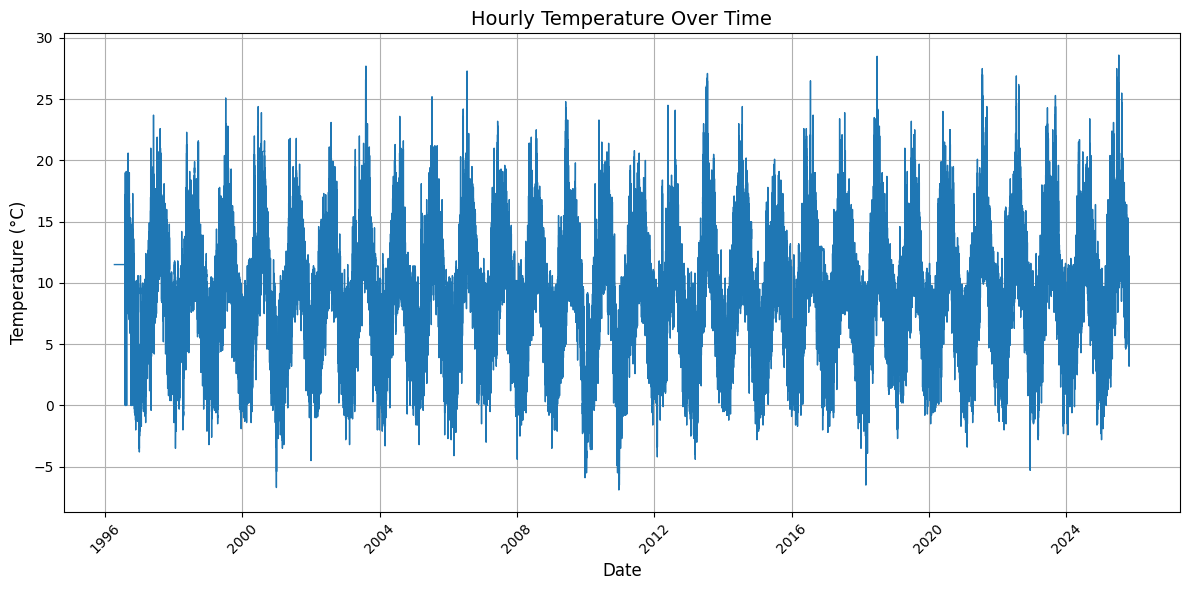

In [62]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df['temp'], color='tab:blue', linewidth=1)
plt.title('Hourly Temperature Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

## 2. Plot the mean temperature each day

In [71]:
# Sanity check, show first 5 rows
df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


In [72]:
'''
# When I did the following code I got NaN for the mean temp. 


# Find the mean temperature for each day
daily_mean_temp = df['temp'].resample('D').mean()

# Sanity check, show first 5 rows
print(daily_mean_temp.head(10))
'''

"\n# When I did the following code I got NaN for the mean temp. \n\n\n# Find the mean temperature for each day\ndaily_mean_temp = df['temp'].resample('D').mean()\n\n# Sanity check, show first 5 rows\nprint(daily_mean_temp.head(10))\n"

In [73]:
# Strip whitespace from 'temp' column
df['temp'] = df['temp'].astype(str).str.strip()

# Convert temp to numeric 
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')

# Check data types - shows temp is now a float
print(df['temp'].dtype)

float64


In [74]:
# Check the index is datetimeindex

print(type(df.index))
print(df.index[10])

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
1996-07-31 17:00:00


In [75]:
# Check temp type and have a look
print(df['temp'].dtype)           # check type
print(df['temp'].unique()[:20])   # see first 20 unique values

float64
[11.5 11.6 12.9 14.5 14.4 14.9 13.9 13.2 15.1 13.3 12.7 10.9 10.8  9.6
  9.7  9.1 10.  10.3 10.2 10.7]


In [76]:
# Calculate the daily mean temp
daily_mean_temp = df['temp'].resample('D').mean()
print(daily_mean_temp.head(10))


date
1996-04-10    11.5
1996-04-11     NaN
1996-04-12     NaN
1996-04-13     NaN
1996-04-14     NaN
1996-04-15     NaN
1996-04-16     NaN
1996-04-17     NaN
1996-04-18     NaN
1996-04-19     NaN
Freq: D, Name: temp, dtype: float64


In [77]:
# As now ChatGPT has told me that the problem is csv file, as in, the fact that there are some
# dates not listed (the dates shown all have temp data). When pandas is trying to create a daily mean, it
# is calculating this even for the dates not in the dataset. 

# Calculate the daily mean temp dropping NaN values
daily_mean_temp = df['temp'].resample('D').mean().dropna()
print(daily_mean_temp.head(10))

date
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
1996-08-05    11.520833
1996-08-06    11.108333
1996-08-07    12.633333
1996-08-08    13.566667
Name: temp, dtype: float64


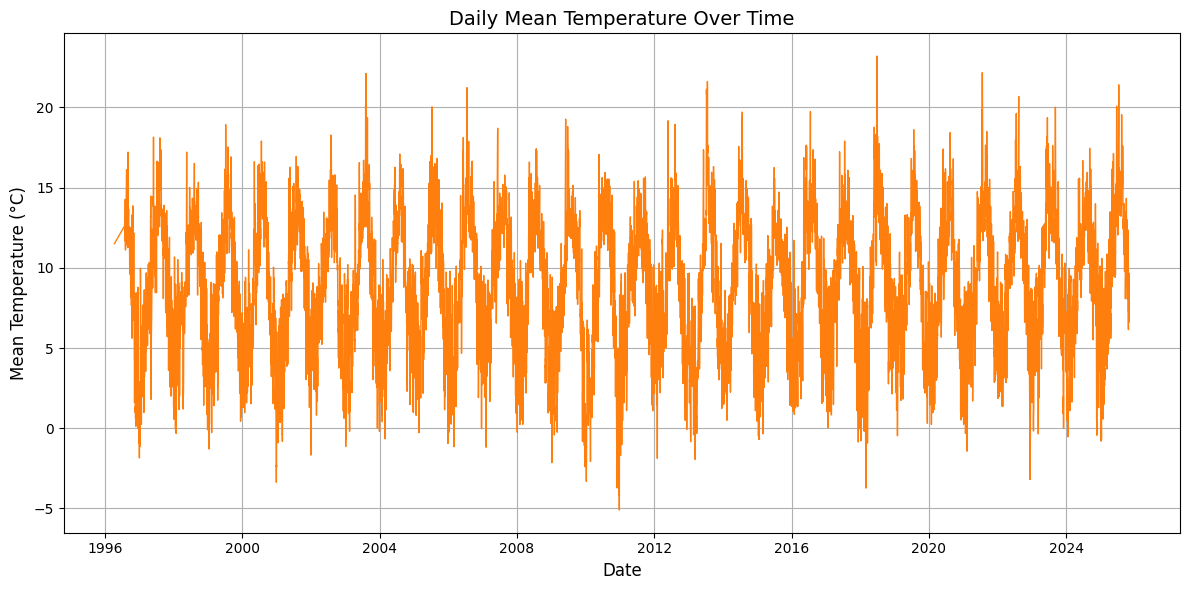

In [78]:
# Plot daily mean temperature (co-pilot suggested code)
plt.figure(figsize=(12,6))
plt.plot(daily_mean_temp.index, daily_mean_temp, color='tab:orange', linewidth=1)
plt.title('Daily Mean Temperature Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.grid(True)
plt.tight_layout()  

## 3. Plot the mean temperature for each month

In [110]:
# Calcaute the mean temperature for each month (co-pilot suggested code)
monthly_mean_temp = df['temp'].resample('ME').mean().dropna()
print(monthly_mean_temp.head(10))

date
1996-04-30    11.500000
1996-07-31    12.650000
1996-08-31    12.946909
1996-09-30    12.174306
1996-10-31     9.614113
1996-11-30     4.909444
1996-12-31     3.209946
1997-01-31     3.483065
1997-02-28     4.990476
1997-03-31     6.770833
Name: temp, dtype: float64


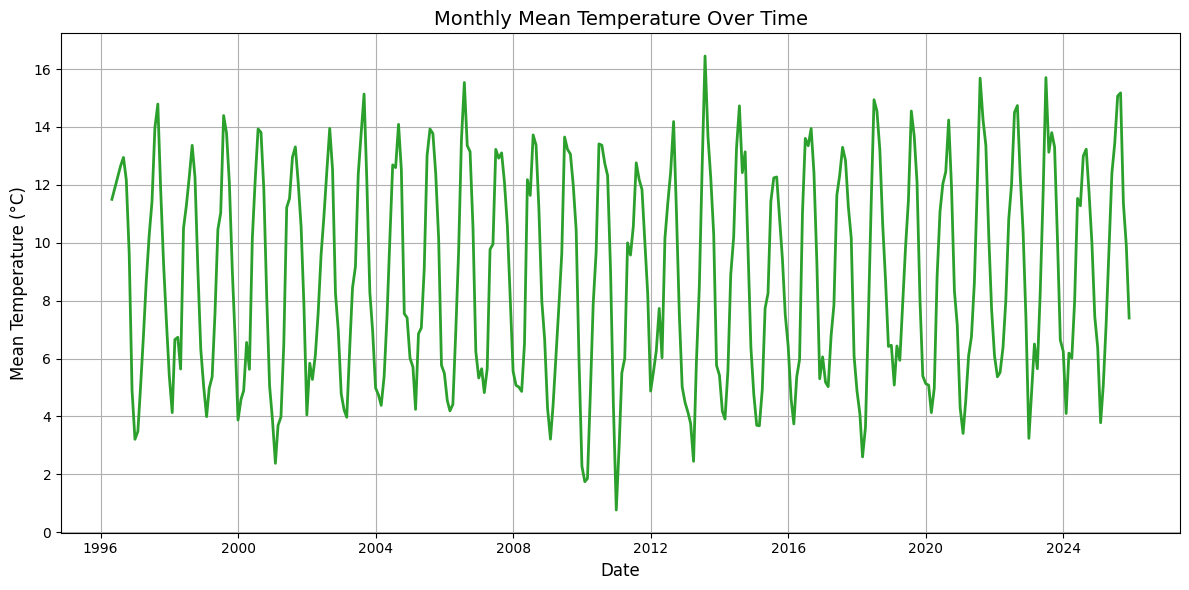

In [82]:
# Plot monthly mean temperature (this code came up from co-pilot and I like it)
plt.figure(figsize=(12,6))
plt.plot(monthly_mean_temp.index, monthly_mean_temp, color='tab:green', linewidth=2)
plt.title('Monthly Mean Temperature Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.grid(True)
plt.tight_layout()  
plt.show()

## 4. Plot the Windspeed

In [85]:
# Plot the windspeed

# Drop NaN values from windspeed
windspeed = df['wdsp'].dropna()
print(windspeed.head(10))


date
1996-04-10 14:00:00    0
1996-07-31 08:00:00    0
1996-07-31 09:00:00    0
1996-07-31 10:00:00    0
1996-07-31 11:00:00    0
1996-07-31 12:00:00    0
1996-07-31 13:00:00    0
1996-07-31 14:00:00    0
1996-07-31 15:00:00    0
1996-07-31 16:00:00    0
Name: wdsp, dtype: object


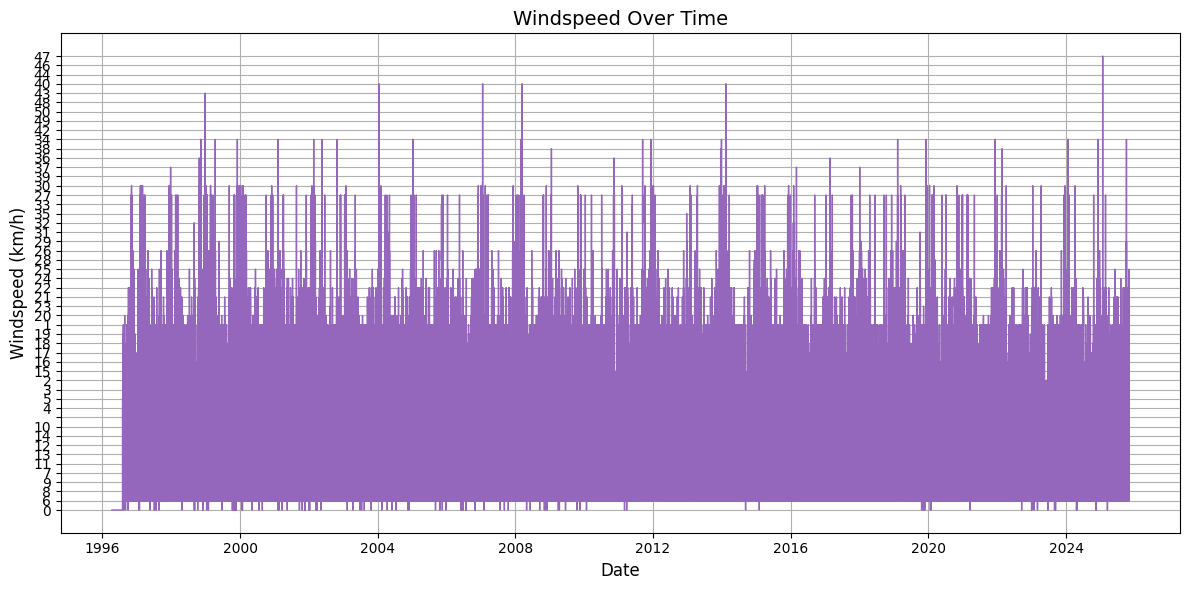

In [86]:
# Plot windspeed (co-pilot suggested code)

plt.figure(figsize=(12,6))
plt.plot(windspeed.index, windspeed, color='tab:purple', linewidth=1)
plt.title('Windspeed Over Time', fontsize=14)  
plt.xlabel('Date', fontsize=12)
plt.ylabel('Windspeed (km/h)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()             

## 5. Calculate rolling windspeed (i.e. over 24 hours)

In [91]:
# Calculate the mean windspeed over a rolling 24 hour window

# Check the data type of windspeed
print(windspeed.dtype)
print(type(windspeed.index))

float64
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [92]:
# Convert windspeed from object to numeric
windspeed = pd.to_numeric(windspeed, errors='coerce')
print(windspeed.dtype)

float64


In [105]:
# Calculate the rolling mean windspeed over a 24 hour window
rolling_windspeed = windspeed.rolling('24h').mean()
print(rolling_windspeed.head(10))

# Add this as a column to the dataframe
df['rolling_wind_24H'] = rolling_windspeed

# Save to csv to check
df.to_csv("weather_with_rolling_wind.csv")


date
1996-04-10 14:00:00    0.0
1996-07-31 08:00:00    0.0
1996-07-31 09:00:00    0.0
1996-07-31 10:00:00    0.0
1996-07-31 11:00:00    0.0
1996-07-31 12:00:00    0.0
1996-07-31 13:00:00    0.0
1996-07-31 14:00:00    0.0
1996-07-31 15:00:00    0.0
1996-07-31 16:00:00    0.0
Name: wdsp, dtype: float64


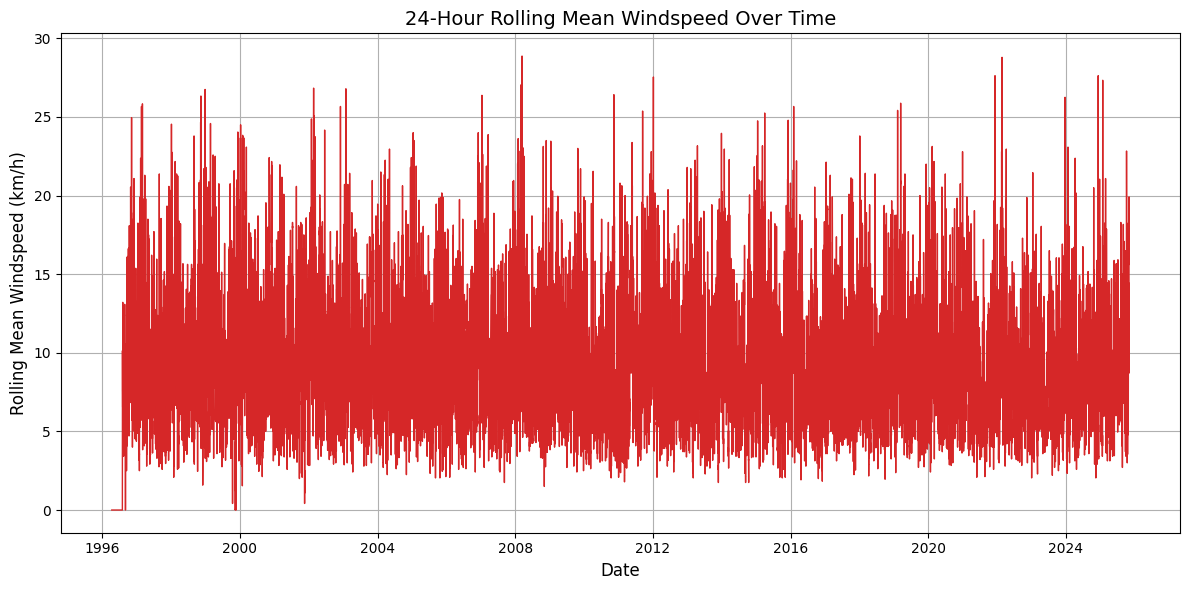

In [106]:
# Plot rolling windspeed (co-pilot suggested code)
plt.figure(figsize=(12,6))
plt.plot(df.index, df['rolling_wind_24H'], color='tab:red', linewidth=1)
plt.title('24-Hour Rolling Mean Windspeed Over Time', fontsize=14)  
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Mean Windspeed (km/h)', fontsize=12)
plt.grid(True)
plt.tight_layout()  
plt.show()

## Plot the maximum windspeed each day

In [107]:
# Calculate the maximum windspeed each day
daily_max_wind = df['wdsp'].resample('D').max().dropna()
print(daily_max_wind.head(10))

date
1996-04-10    0
1996-07-31    0
1996-08-01    9
1996-08-02    9
1996-08-03    9
1996-08-04    7
1996-08-05    9
1996-08-06    9
1996-08-07    9
1996-08-08    8
Name: wdsp, dtype: object


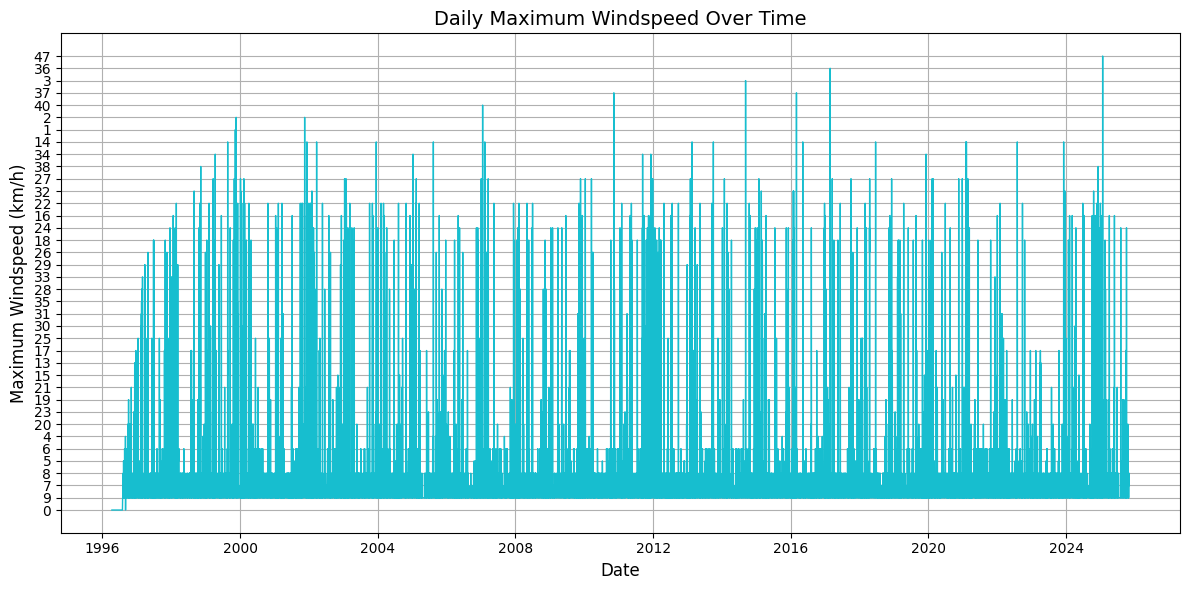

In [98]:
# Plot daily maximum windspeed (co-pilot suggested code)
plt.figure(figsize=(12,6))
plt.plot(daily_max_wind.index, daily_max_wind, color='tab:cyan', linewidth=1)
plt.title('Daily Maximum Windspeed Over Time', fontsize=14)  
plt.xlabel('Date', fontsize=12)
plt.ylabel('Maximum Windspeed (km/h)', fontsize=12)
plt.grid(True)
plt.tight_layout()  
plt.show()  

# 7. Plot the monthly mean of the daily maximum windspeed

In [108]:
# Convert daily_max_wind to numeric, coercing errors
daily_max_wind = pd.to_numeric(daily_max_wind.astype(str).str.strip(), errors='coerce')

# Calculate the monthly mean of the daily maximum windspeed
monthly_mean_max_wind = daily_max_wind.resample('ME').mean().dropna()
print(monthly_mean_max_wind.head(10))

date
1996-04-30     0.000000
1996-07-31     0.000000
1996-08-31     8.387097
1996-09-30     8.366667
1996-10-31    10.322581
1996-11-30     9.533333
1996-12-31     9.354839
1997-01-31     9.354839
1997-02-28    14.250000
1997-03-31     9.967742
Name: wdsp, dtype: float64


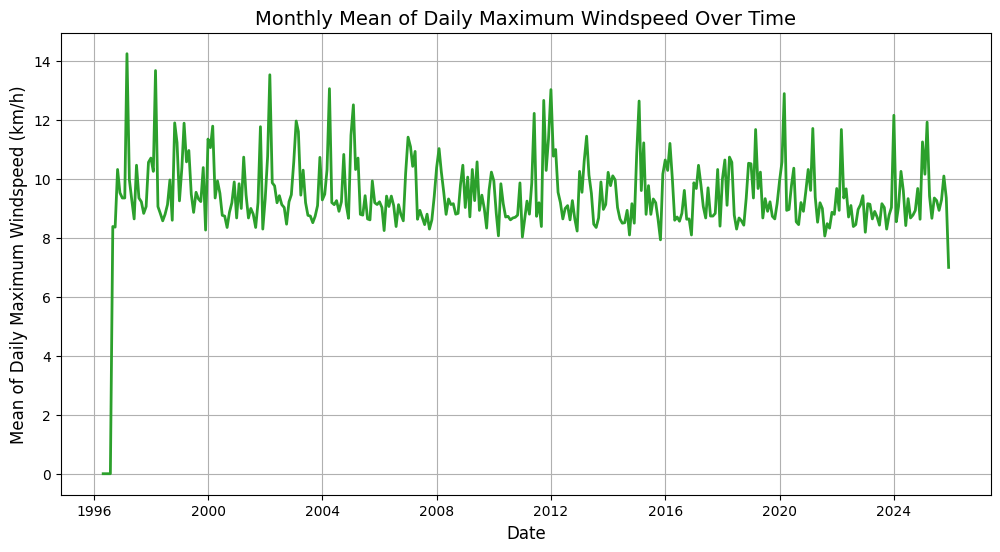

In [109]:
# Plot monthly mean of the daily maximum windspeed (co-pilot suggested code)
plt.figure(figsize=(12,6))
plt.plot(monthly_mean_max_wind.index, monthly_mean_max_wind, color='tab:green', linewidth=2)
plt.title('Monthly Mean of Daily Maximum Windspeed Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean of Daily Maximum Windspeed (km/h)', fontsize=12)
plt.grid(True)

### Note

I found starting on this very testing, with the format (and mess) the csv was in. I, again, would be lost without ChatGPT and co-pilot helped a lot too. I know what I want to do to the data but things like NaN and whitespace complicates things, as does my inexperince coding. But I really do find I am getting alot more comfortable with what things should look like, and what the processes are like to get to where I want to go. I definitely find last term's learnings sinking in a lot more and enjoy practicing and the challenge of the new term's work. Hopefully the outputs are right!

# END